# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [9]:
import os
from PIL import Image
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.use('TkAgg')
%matplotlib inline
from utils import get_dataset

In [2]:
dataset = get_dataset("data/waymo/training_and_validation/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


2021-12-07 20:14:51.494069: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-07 20:14:51.501461: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-07 20:14:51.501677: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-07 20:14:51.502392: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    image, groundtruth_boxes, groundtruth_classes = None, [], []
    for key, value in batch.items():
        if key == 'image':
            image = value.numpy()
        if key == 'groundtruth_boxes':
            groundtruth_boxes = value.numpy()
        if key == 'groundtruth_classes':
            groundtruth_classes = value.numpy()
    if image is None:
        print('No data retrieved.')
        return
    img_shape = image.shape

    _, ax = plt.subplots(1,figsize=(10, 10))
    color_map = {1:'r', 2:'g', 4:'b'}
    for cl, bb in zip(groundtruth_classes, groundtruth_boxes):
        y1, x1, y2, x2 = bb
        y1 = y1*img_shape[0]
        x1 = x1*img_shape[1]
        y2 = y2*img_shape[0]
        x2 = x2*img_shape[1]
        rec = mpl.patches.Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor=color_map[cl])
        ax.add_patch(rec)
    plt.imshow(image)
    plt.savefig("./output.png", pad_inches=0, bbox_inches="tight")
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

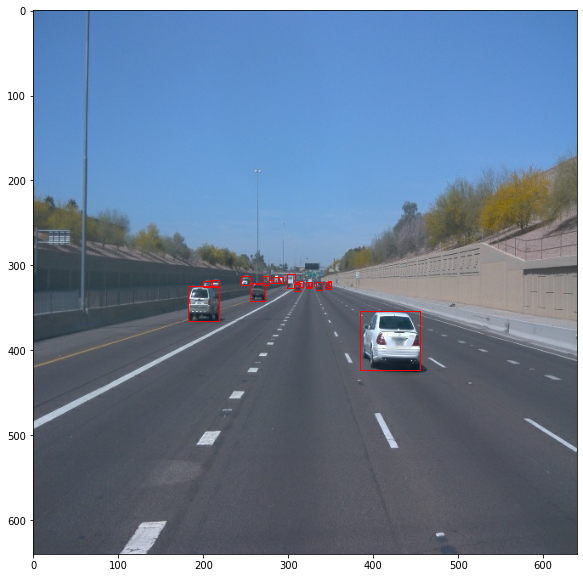

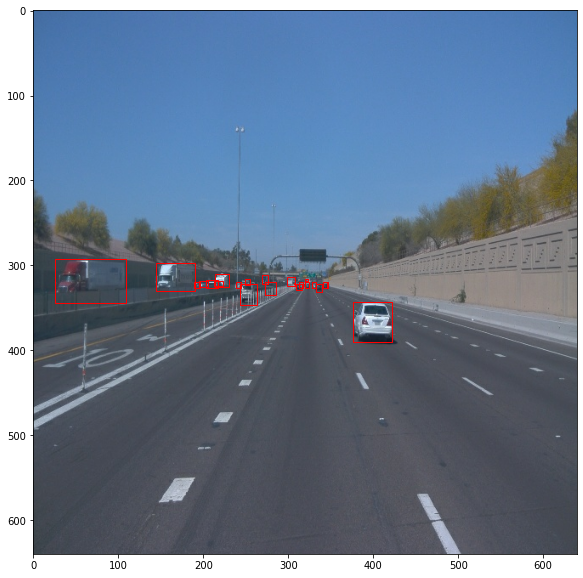

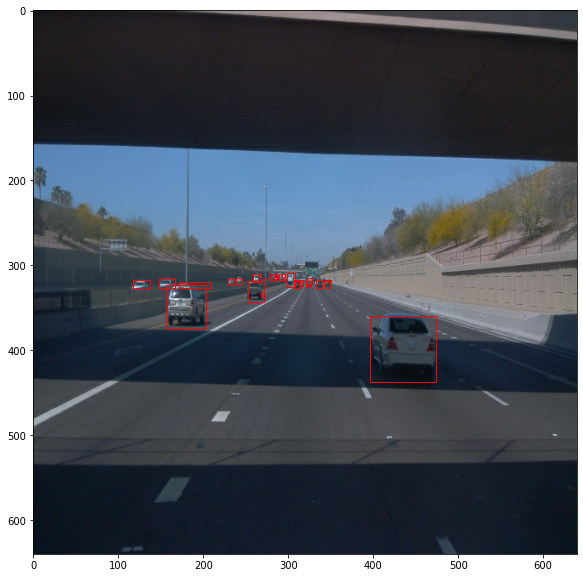

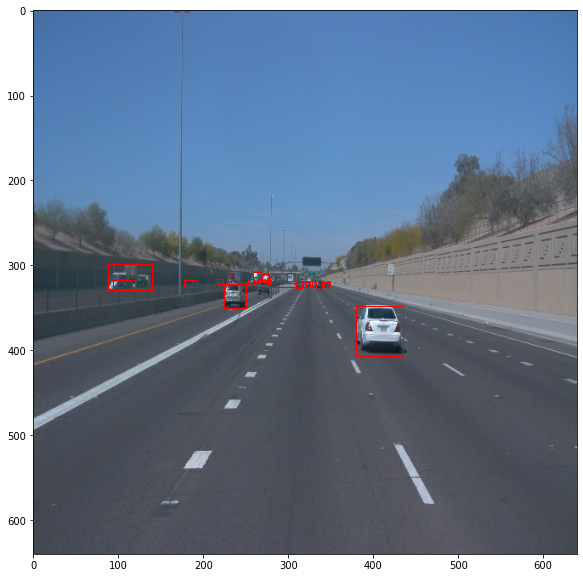

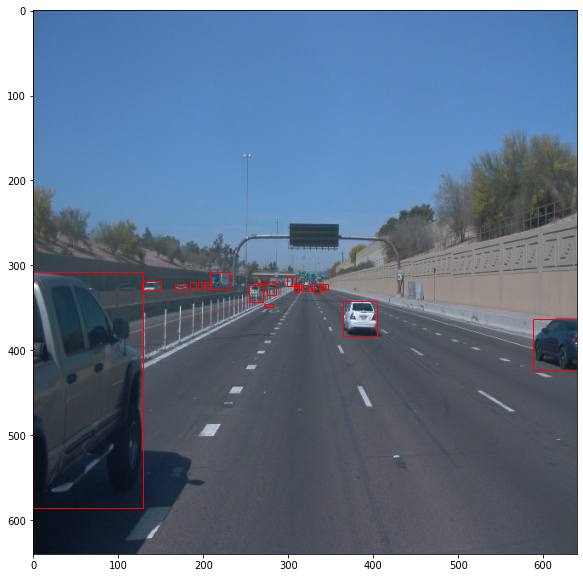

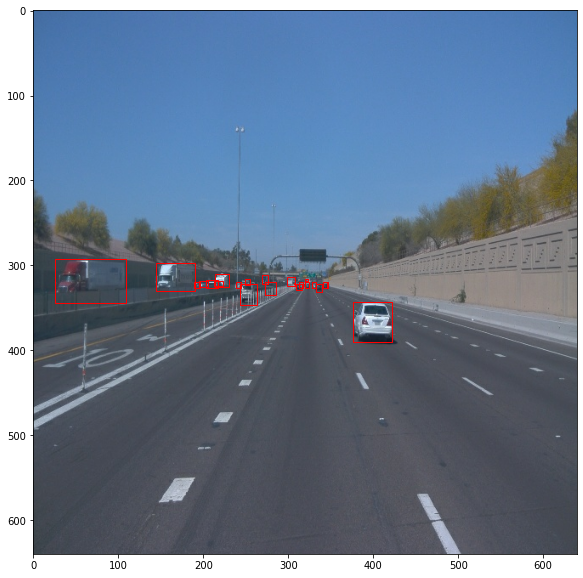

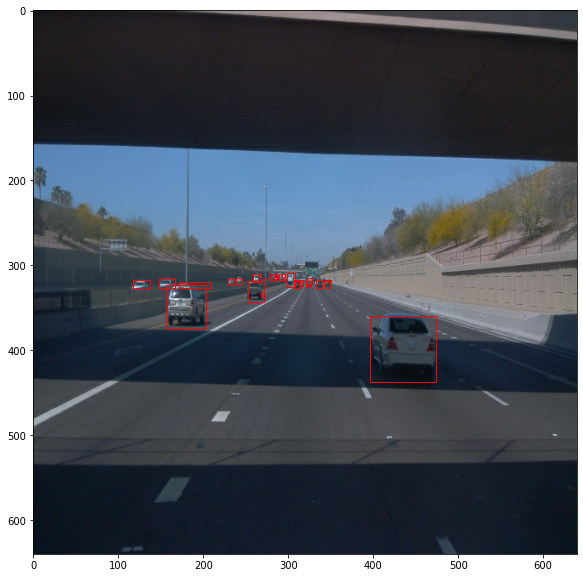

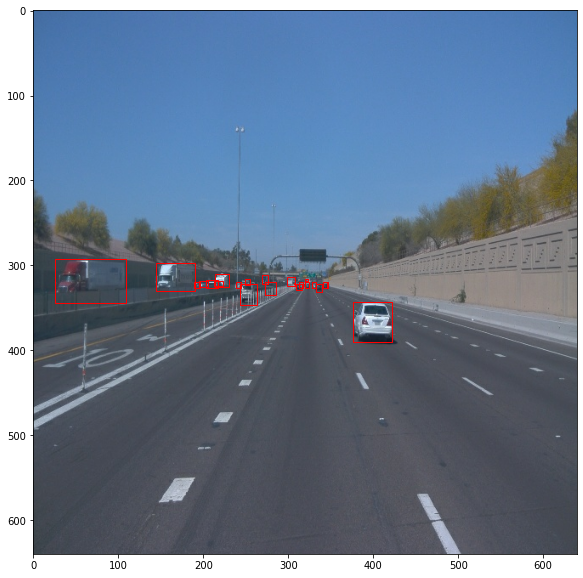

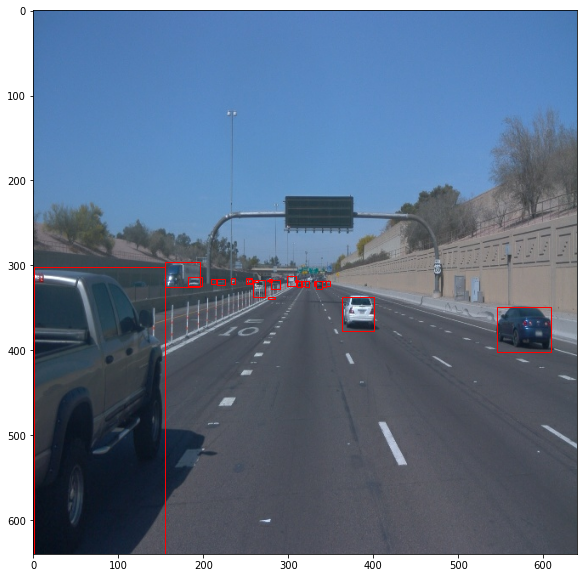

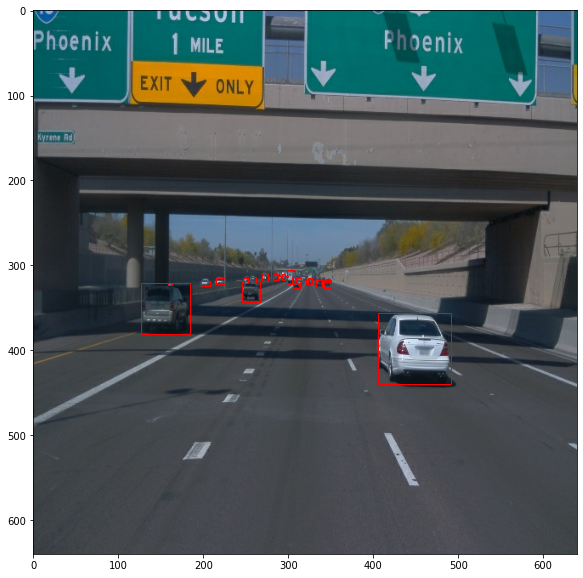

In [10]:
for batch in dataset.shuffle(100).take(10):
    display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [5]:
def retrieve_bbox_count_size_location(batch, info_dict):
    """
    This function takes a batch from the dataset and 
    count number, size, and location distribution of vehicle, pedestrian, cyclist.
    """
    image, groundtruth_boxes, groundtruth_classes = None, [], []
    for key, value in batch.items():
        if key == 'image':
            image = value.numpy()
        if key == 'groundtruth_boxes':
            groundtruth_boxes = value.numpy()
        if key == 'groundtruth_classes':
            groundtruth_classes = value.numpy()
    if image is None:
        print('No data retrieved.')
        return
    img_shape = image.shape

    for cl, bb in zip(groundtruth_classes, groundtruth_boxes):
        y1, x1, y2, x2 = bb
        y1 = y1*img_shape[0]
        x1 = x1*img_shape[1]
        y2 = y2*img_shape[0]
        x2 = x2*img_shape[1]
        info_dict[cl]['size'].append(((x2 - x1), (y2 - y1)))
        info_dict[cl]['location'].append(((x1+x2)/2, (y1+y2)/2))

In [6]:
info_dict = {1: {'size': [], 'location': []},
             2: {'size': [], 'location': []},
             4: {'size': [], 'location': []}}
data_dir = 'data/waymo/training_and_validation'
files = os.listdir(data_dir)
for f in files:
    dataset = get_dataset(os.path.join(data_dir, f))
    for batch in dataset.shuffle(10).take(10):
        retrieve_bbox_count_size_location(batch, info_dict)
print(len(info_dict[1]['size']), len(info_dict[2]['size']), len(info_dict[2]['size']))

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-12161824480686739258_1813_380_1833_380_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-12161824480686739258_1813_380_1833_380_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10061305430875486848_1080_000_1100_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10061305430875486848_1080_000_1100_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-1022527355599519580_4866_960_4886_960_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validati

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10327752107000040525_1120_000_1140_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10327752107000040525_1120_000_1140_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-12174529769287588121_3848_440_3868_440_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-12174529769287588121_3848_440_3868_440_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10444454289801298640_4360_000_4380_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validat

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10927752430968246422_4940_000_4960_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10927752430968246422_4940_000_4960_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11219370372259322863_5320_000_5340_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-11219370372259322863_5320_000_5340_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11799592541704458019_9828_750_9848_750_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validat

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10588771936253546636_2300_000_2320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10588771936253546636_2300_000_2320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10235335145367115211_5420_000_5440_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10235335145367115211_5420_000_5440_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10964956617027590844_1584_680_1604_680_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validat

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11236550977973464715_3620_000_3640_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-11236550977973464715_3620_000_3640_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10940952441434390507_1888_710_1908_710_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validat

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-10584247114982259878_490_000_510_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-10584247114982259878_490_000_510_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11486225968269855324_92_000_112_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segment-11486225968269855324_92_000_112_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/segment-11925224148023145510_1040_000_1060_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/segmen

In [7]:
# calculate average number of bboxes in each image
label_map = {1: 'vehicle', 2: 'pedestrian', 4: 'cyclist'}
num_frames = 10 * len(files)
print('Average number of bboxes per class in each image:')
for key in info_dict:
    avg_bbox = len(info_dict[key]['size']) / num_frames
    print(label_map[key], avg_bbox)

Average number of bboxes per class in each image:
vehicle 18.01237113402062
pedestrian 5.312371134020618
cyclist 0.12474226804123711


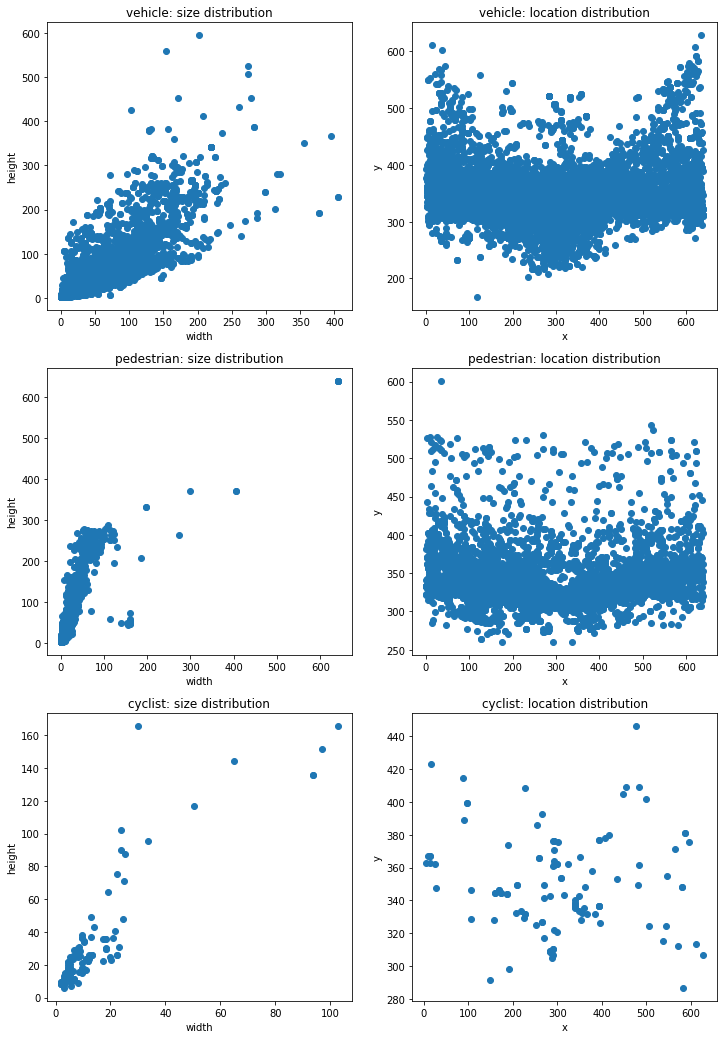

In [11]:
# display bbox size and location distribution per class
_, ax = plt.subplots(3, 2, figsize=(12, 18))
for i,cl in enumerate([1, 2, 4]):
    sizes = np.array(info_dict[cl]['size'])
    ax[i][0].set_title(label_map[cl] + ': size distribution')
    ax[i][0].set_xlabel('width')
    ax[i][0].set_ylabel('height')
    ax[i][0].scatter(sizes[:, 0], sizes[:, 1])
    
    locations = np.array(info_dict[cl]['location'])
    ax[i][1].set_title(label_map[cl] + ': location distribution')
    ax[i][1].set_xlabel('x')
    ax[i][1].set_ylabel('y')
    ax[i][1].scatter(locations[:, 0], locations[:, 1])
plt.show()